In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/archive (3).zip',encoding='ISO-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.shape

(15509, 10)

In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


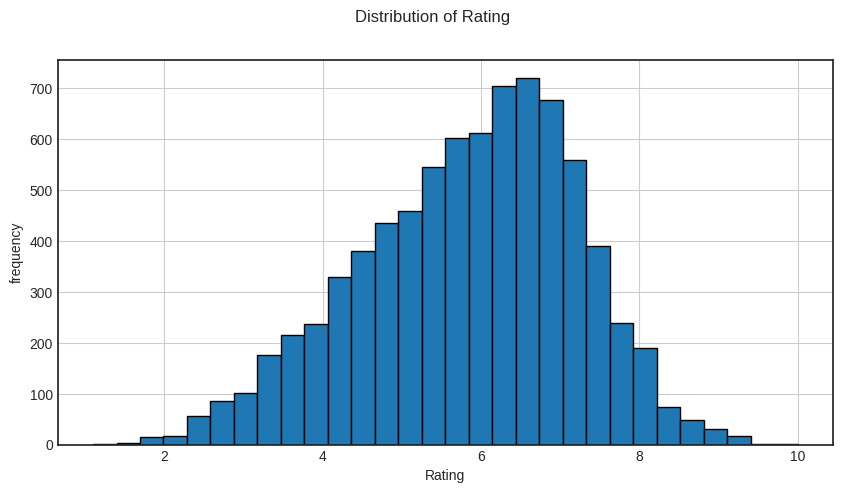

In [ ]:
df['Rating'].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('frequency')
plt.show()

<ipython-input-61-0f4cac45d355>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='viridis')


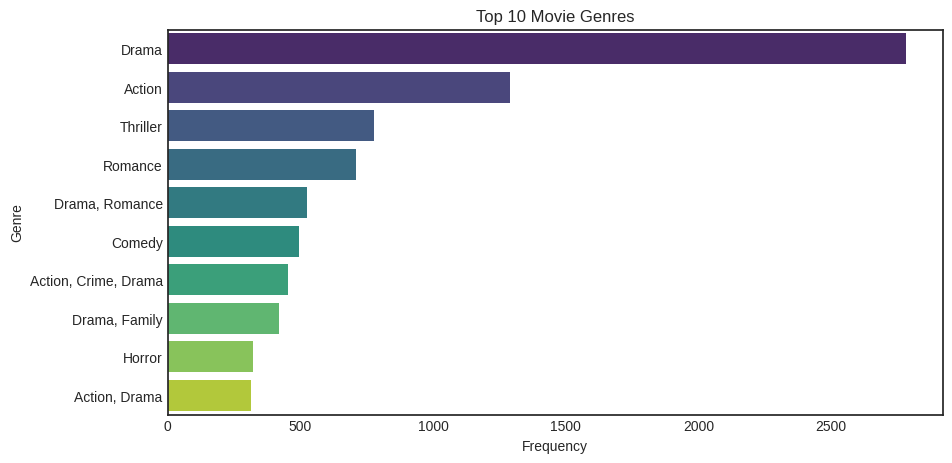

In [ ]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Top 10 Movie Genres')
plt.show()

In [ ]:
Topratingmovies = df[df['Rating'] > 8.5]
high_rating_movies = Topratingmovies.sort_values(by='Rating', ascending=False)
high_rating_movies.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,(2020),94 min,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,(2021),79 min,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,(2020),NaN,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
6852,June,(2021),93 min,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,(2020),113 min,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
11704,Ram-Path,(2017),NaN,Documentary,9.4,5,Ashish Dubey,Ishan Jacob,NaN,NaN
5077,Gho Gho Rani,(2019),105 min,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
8344,Love Sorries,(2021),101 min,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
5125,God of gods,(2019),90 min,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


In [ ]:
 #Analysis : Movies with the most votes and their performance
df['Votes']=pd.to_numeric(df['Votes'],errors='coerce')
most_votes = df.nlargest(10, 'Votes')[[ 'Votes', 'Rating']]
print("\nMovies with the Most Votes:")
print(most_votes)



Movies with the Most Votes:
       Votes  Rating
12569  999.0     7.1
5663   998.0     6.8
7930   996.0     6.0
3961   986.0     5.2
6241   985.0     7.4
7083   985.0     8.1
9822   984.0     7.5
12     983.0     6.5
2612   982.0     6.0
2453   981.0     5.0


In [ ]:
#Directors with the most movies
top_directors = df['Director'].value_counts().head(10)
print("\nTop 10 Directors with Most Movies:")
print(top_directors)


Top 10 Directors with Most Movies:
Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
Nanabhai Bhatt      46
Dhirubhai Desai     46
Mohammed Hussain    44
David Dhawan        44
B.R. Ishara         44
Name: count, dtype: int64


TRAINING MODELS

In [ ]:
df = df.dropna(subset=['Rating'])
df = df.fillna('Votes')

In [ ]:
xx = df[['Genre', 'Director' , 'Votes']]
yy = df['Rating']

In [ ]:
xx.head(5)

,Genre,Director,Votes
1,Drama,Gaurav Bakshi,8
3,"Comedy, Romance",Ovais Khan,35
5,"Comedy, Drama, Musical",Rahul Rawail,827
6,"Drama, Romance, War",Shoojit Sircar,"1,086"
8,"Horror, Mystery, Thriller",Allyson Patel,326


In [ ]:
yy.head(5)

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6


In [ ]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=42)

In [ ]:
xx_train.head(5)

,Genre,Director,Votes
8157,"Comedy, Drama",Ronit Jadhav,10
8455,Drama,Shibu Mitra,16
14490,"Drama, War",Kabir Khan,"17,774"
2697,Action,Gautam Verma,17
15470,"Documentary, Biography, Musical",Sandip Ray,33


In [ ]:
xx_test.head(5)

,Genre,Director,Votes
9456,Romance,Gautam Siddhartha,6
14816,"Action, Biography, Crime",Ram Gopal Varma,711
3213,"Action, Adventure, Thriller",Aditya Datt,"2,425"
3778,Drama,Ashwini Chaudhary,242
5775,Horror,Suraj Bharti,11


In [ ]:
yy_train.head(5)

,Rating
8157,8.8
8455,6.0
14490,3.8
2697,5.8
15470,8.2


In [ ]:
yy_test.head(5)

,Rating
9456,3.3
14816,5.3
3213,5.7
3778,7.2
5775,3.5


In [ ]:
preprocessor = ColumnTransformer(transformers=[('categorical,', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Votes'])])
preprocessor

ColumnTransformer(transformers=[('categorical,',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Genre', 'Director', 'Votes'])])

In [ ]:
pipeline = Pipeline(steps=[ ('preprocessor', preprocessor),('regressor', LinearRegression())])
pipeline
pipeline.fit(xx_train, yy_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical,',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director',
                                                   'Votes'])])),
                ('regressor', LinearRegression())])

In [ ]:
yy_pred = pipeline.predict(xx_test)
yy_pred

array([5.42573703, 6.90675976, 4.68718943, ..., 5.05611094, 5.75663606,
       6.0248373 ])

In [ ]:
mse = mean_squared_error(yy_test, yy_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(yy_test, yy_pred)
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.190774555006216
R^2 Score: -0.17837736662618253
